In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os

In [3]:
# Define dataset paths
train_data = "data/train"
validation_data = "data/test"

In [5]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest",
)

In [7]:
# Rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [9]:
# Load dataset
train_generator = train_datagen.flow_from_directory(
    train_data,
    color_mode="grayscale",
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data,
    color_mode="grayscale",
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

Found 28709 images belonging to 7 classes.
Found 7179 images belonging to 7 classes.


In [11]:
# Print Class Labels
print("Class Labels Mapping:", train_generator.class_indices)

# Class labels for emotions
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Verify dataset loading
img, label = train_generator.__next__()

Class Labels Mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [13]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(48, 48, 1)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(7, activation="softmax")
])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# Count images in dataset
num_train_imgs = sum(len(files) for _, _, files in os.walk(train_data))
num_test_imgs = sum(len(files) for _, _, files in os.walk(validation_data))

In [19]:
# Check if dataset is loaded properly
if num_train_imgs == 0 or num_test_imgs == 0:
    print("⚠️ Warning: No images found in train/test directories! Check dataset paths.")
else:
    print(f"Training images: {num_train_imgs}, Validation images: {num_test_imgs}")

Training images: 28709, Validation images: 7179


In [31]:
# Train the model
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=max(1, num_train_imgs // 32),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=max(1, num_test_imgs // 32),
)
 # Save the model
model.save("model_file1.h5")  
print("✅ Model saved as 'model_file1.h5'")

Epoch 1/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 333s 371ms/step - accuracy: 0.2596 - loss: 1.7925 - val_accuracy: 0.3139 - val_loss: 1.6766
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.1562 - loss: 1.7872 - val_accuracy: 0.1818 - val_loss: 1.6509
Epoch 3/100


C:\Users\User\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 125s 140ms/step - accuracy: 0.3199 - loss: 1.6898 - val_accuracy: 0.4216 - val_loss: 1.4934
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.3750 - loss: 1.5753 - val_accuracy: 0.6364 - val_loss: 0.9237
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 130s 145ms/step - accuracy: 0.3824 - loss: 1.5657 - val_accuracy: 0.4621 - val_loss: 1.3976
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.4062 - loss: 1.6289 - val_accuracy: 0.6364 - val_loss: 1.2827
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 127s 141ms/step - accuracy: 0.4255 - loss: 1.4773 - val_accuracy: 0.4798 - val_loss: 1.3429
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.4375 - loss: 1.3315 - val_accuracy: 0.3636 - val_loss: 1.3174
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 122s 136ms/step - accuracy: 0.4559 - loss: 1.4135 - val_accuracy: 0.5082 - val_loss: 1.2884
Epoch 10/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.5625 - loss: 1.1788 -

✅ Model saved as 'model_file1.h5'


In [35]:
import pickle
# ✅ Save training history
with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)
print("✅ Training history saved as 'training_history.pkl'")

✅ Training history saved as 'training_history.pkl'


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # Added for loading history
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# Load the trained model
model = load_model('model_file1.h5')

In [41]:
# Load training history (fix for missing model.history)
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)

In [43]:
# Define paths to dataset
test_data = "data/test"

# Preprocess test dataset
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [45]:
# Create validation data generator
validation_generator = validation_datagen.flow_from_directory(
    test_data,
    color_mode="grayscale",
    target_size=(48, 48),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 7179 images belonging to 7 classes.


In [47]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=1)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.5612 - loss: 1.1372
Test Accuracy: 0.6209778785705566
Test Loss: 1.020603895187378


In [49]:
# Make predictions
predictions = model.predict(validation_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step


In [51]:
# Classification Report
report = classification_report(true_labels, predicted_classes, target_names=validation_generator.class_indices.keys())
print("Classification Report:\n", report)

# Save Classification Report
with open('classification_report.txt', 'w') as f:
    f.write(report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.54      0.53      0.53       959
     disgust       0.84      0.19      0.31       111
        fear       0.48      0.35      0.41      1024
       happy       0.83      0.85      0.84      1774
     neutral       0.54      0.64      0.58      1233
         sad       0.49      0.53      0.51      1247
    surprise       0.73      0.75      0.74       831

    accuracy                           0.62      7179
   macro avg       0.64      0.55      0.56      7179
weighted avg       0.62      0.62      0.62      7179



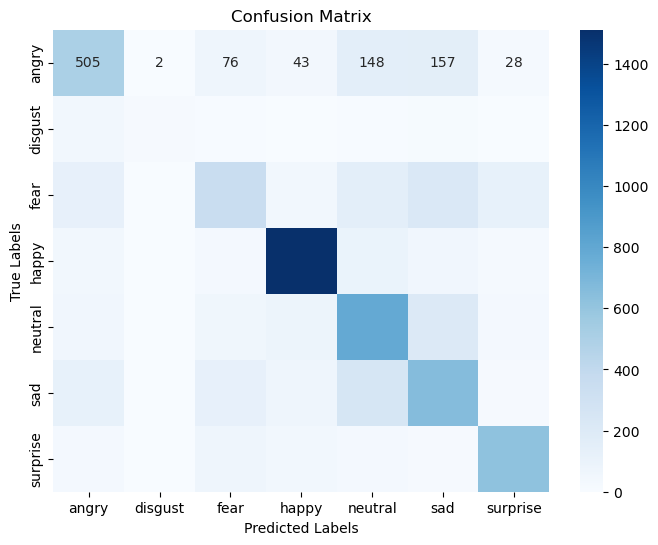

In [53]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

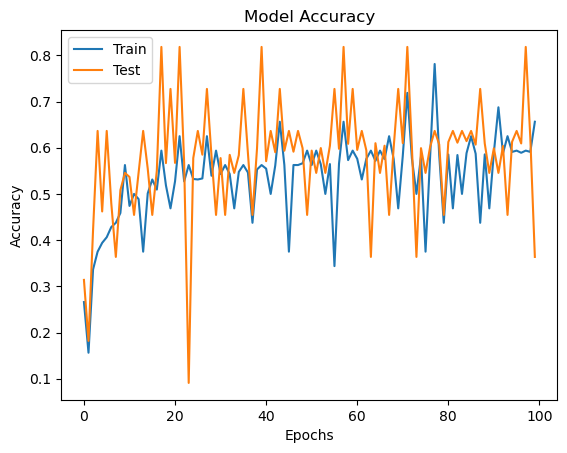

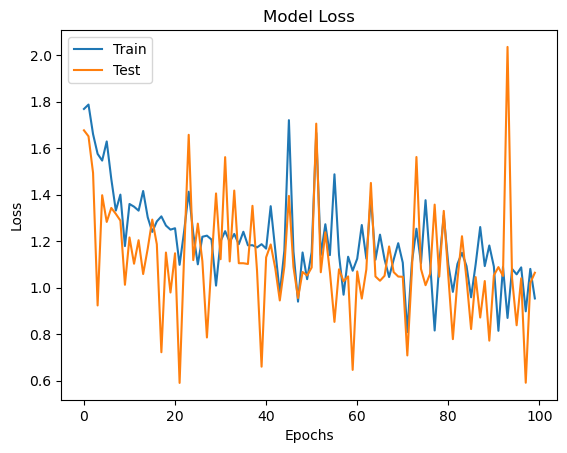

In [57]:
# Plot Training Accuracy and Loss
plt.figure()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.savefig('accuracy_plot.png')
plt.show()

plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.savefig('loss_plot.png')
plt.show()

In [1]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('model_file1.h5')

# Load Haar Cascade for face detection
faceDetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Emotion labels
labels_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

# Load and check image
image_path = "faces-small.jpg"
frame = cv2.imread(image_path)

if frame is None:
    print(f"❌ Error: Could not read image '{image_path}'. Check the file path!")
else:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceDetect.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3)

    if len(faces) == 0:
        print("⚠️ No face detected in the image.")
    else:
        for (x, y, w, h) in faces:
            sub_face_img = gray[y:y+h, x:x+w]
            resized = cv2.resize(sub_face_img, (48, 48))
            normalized = resized / 255.0
            reshaped = np.reshape(normalized, (1, 48, 48, 1))

            # Predict emotion
            result = model.predict(reshaped)
            label = np.argmax(result, axis=1)[0]

            # Draw rectangle & label
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

        # Display the image
        cv2.imshow("Detected Faces", frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [3]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('model_file1.h5')

# Initialize webcam
video = cv2.VideoCapture(0)

if not video.isOpened():
    print("❌ Error: Could not open webcam!")
    exit()

# Load Haar Cascade for face detection
faceDetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Emotion labels
labels_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

while True:
    ret, frame = video.read()

    if not ret:
        print("⚠️ Warning: Failed to capture frame. Exiting...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceDetect.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("⚠️ No face detected.")
    
    for (x, y, w, h) in faces:
        sub_face_img = gray[y:y+h, x:x+w]
        resized = cv2.resize(sub_face_img, (48, 48))
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1, 48, 48, 1))

        # Predict emotion
        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]

        # Draw rectangle & label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (50, 50, 255), 2)
        cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    # Show the video stream
    cv2.imshow("Facial Emotion Recognition", frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("🔴 Exiting...")
        break

# Release resources
video.release()
cv2.destroyAllWindows()


⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
⚠️ No face detected.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
⚠️ No face detected.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━